In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset.

In [2]:
fDF=pd.read_csv("FlightscrapeNew.csv")

In [3]:
fDF.head(30)

,Unnamed: 0,Unnamed: 0.1,Airline,Flight Number,Date of Departure,From,To,Duration,Total Stops,Price
0,0,0.0,IndiGo,6E-171,"Wed, Feb 16",New Delhi,Mumbai,2h 05m,Non Stop,"2,410"
1,1,1.0,IndiGo,6E-6202,"Wed, Feb 16",Mumbai,Mumbai,2h 05m,Non Stop,"2,410"
2,2,2.0,Air Asia,I5-764,"Wed, Feb 16",New Delhi,Mumbai,2h 10m,Non Stop,"2,410"
3,3,3.0,IndiGo,6E-2054,"Wed, Feb 16",Mumbai,Mumbai,2h 10m,Non Stop,"2,410"
4,4,4.0,IndiGo,6E-5001,"Wed, Feb 16",New Delhi,Mumbai,2h 10m,Non Stop,"2,410"
5,5,5.0,IndiGo,6E-5329,"Wed, Feb 16",Mumbai,Mumbai,2h 10m,Non Stop,"2,410"
6,6,6.0,IndiGo,6E-6278,"Wed, Feb 16",New Delhi,Mumbai,2h 10m,Non Stop,"2,410"
7,7,7.0,IndiGo,6E-218,"Wed, Feb 16",Mumbai,Mumbai,2h 10m,Non Stop,"2,410"
8,8,8.0,IndiGo,6E-5328,"Wed, Feb 16",New Delhi,Mumbai,2h 15m,Non Stop,"2,410"
9,9,9.0,Air Asia,I5-482,"Wed, Feb 16",Mumbai,Mumbai,2h 15m,Non Stop,"2,410"


In [4]:
fDF.shape

(1755, 10)

#### checking for null values

In [5]:
fDF.isnull().sum()

Unnamed: 0             0
Unnamed: 0.1         210
Airline                0
Flight Number          0
Date of Departure      0
From                   0
To                     0
Duration             180
Total Stops          165
Price                  0
dtype: int64

There are no null values in dataset.

#### Checking for blank spaces, random characters in each column

In [6]:
search =[" ","-",]

for c in fDF:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((fDF[c] == s).sum())

  in Unnamed: 0 =  0
- in Unnamed: 0 =  0
  in Unnamed: 0.1 =  0
- in Unnamed: 0.1 =  0
  in Airline =  0
- in Airline =  0
  in Flight Number =  0
- in Flight Number =  0
  in Date of Departure =  0
- in Date of Departure =  60
  in From =  0
- in From =  0
  in To =  0
- in To =  0
  in Duration =  0
- in Duration =  0
  in Total Stops =  0
- in Total Stops =  0
  in Price =  0
- in Price =  0


There are no blank spaces, random characters  in columns of train dataset

### Dataframe Description:

Problem Statement:

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

A Predictive Model is needed to be built using collected data to predict fares of flights.

Size of Data set: 2585 records

### FEATURES:

Airline: The name of the airline.

Flight Number: Number of Flight

Date of Departure: The date of the journey

From: The source from which the service begins.

To: The destination where the service ends.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

   
### Target / Label Column:
    
Price: The price of the ticket

 



#### Getting the basic summary and statistical information of the data.

In [7]:
fDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1755 non-null   int64  
 1   Unnamed: 0.1       1545 non-null   float64
 2   Airline            1755 non-null   object 
 3   Flight Number      1755 non-null   object 
 4   Date of Departure  1755 non-null   object 
 5   From               1755 non-null   object 
 6   To                 1755 non-null   object 
 7   Duration           1575 non-null   object 
 8   Total Stops        1590 non-null   object 
 9   Price              1755 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 137.2+ KB


In [8]:
fDF.nunique() #the number of unique values in each column

Unnamed: 0           1545
Unnamed: 0.1         1545
Airline                 9
Flight Number        1073
Date of Departure      40
From                   23
To                     22
Duration              366
Total Stops            12
Price                 444
dtype: int64

####  Data Cleaning

In [9]:
fDF['Total Stops'].value_counts()

1-stop                508
1 Stop                456
Non Stop              283
non-stop              151
2 Stops               120
2+-stop                33
2 Stop(s)              26
1-stop Via Indore       4
1-stop Via IXU          4
1-stop Via Raipur       2
1-stop Via STV          2
1-stop Via Chennai      1
Name: Total Stops, dtype: int64

In [10]:
fDF['Total Stops'] = fDF['Total Stops'].replace({'1 Stop':'1-stop','Non Stop':'non-stop','2 Stop':'2 Stop(s)','2 Stops':'2 Stop(s)','1-stop Via Indore':'1-stop','1-stop Via IXU':'1-stop','1-stop Via STV':'1-stop','1-stop Via Raipur':'1-stop','1-stop Via Chennai':'1-stop'})

In [11]:
fDF['Total Stops'].value_counts()

1-stop       977
non-stop     434
2 Stop(s)    146
2+-stop       33
Name: Total Stops, dtype: int64

In [12]:
fDF['Airline'].value_counts()

IndiGo       534
Air India    282
Air Asia     214
Vistara      203
Indigo       134
GO FIRST     119
SpiceJet     106
Go First      91
AirAsia       72
Name: Airline, dtype: int64

In [13]:
fDF['Airline'] = fDF['Airline'].replace({'Indigo':'IndiGo','AirAsia':'Air Asia','GO FIRST':'Go First'})

In [14]:
fDF['Airline'].value_counts()

IndiGo       668
Air Asia     286
Air India    282
Go First     210
Vistara      203
SpiceJet     106
Name: Airline, dtype: int64

In [15]:
fDF['From'].value_counts()

Delhi         705
Mumbai        155
New Delhi     155
Bangalore     140
Kolkata       140
Hyderabad     120
Goa            50
Chennai        40
Pune           40
Patna          30
Jaipur         20
Port Blair     20
Lucknow        20
Guwahati       20
Dehradun       20
Ahmedabad      10
Tirupati       10
Varanasi       10
Kochi          10
Coimbatore     10
Chandigarh     10
Vijayawada     10
Bagdogra       10
Name: From, dtype: int64

In [16]:
fDF['From'] = fDF['From'].replace({'Delhi':'New Delhi'})

In [17]:
fDF['From'].value_counts()

New Delhi     860
Mumbai        155
Bangalore     140
Kolkata       140
Hyderabad     120
Goa            50
Chennai        40
Pune           40
Patna          30
Port Blair     20
Guwahati       20
Lucknow        20
Jaipur         20
Dehradun       20
Ahmedabad      10
Tirupati       10
Varanasi       10
Kochi          10
Coimbatore     10
Chandigarh     10
Vijayawada     10
Bagdogra       10
Name: From, dtype: int64

In [18]:
fDF['To'].value_counts()

Mumbai        567
Bangalore     355
New Delhi     160
Kolkata       150
Hyderabad     120
Pune          103
Goa            50
Chennai        40
Patna          30
Port Blair     20
Guwahati       20
Lucknow        20
Jaipur         20
Dehradun       20
Ahmedabad      10
Tirupati       10
Varanasi       10
Kochi          10
Coimbatore     10
Chandigarh     10
Vijayawada     10
Bagdogra       10
Name: To, dtype: int64

In [19]:
fDF

,Unnamed: 0,Unnamed: 0.1,Airline,Flight Number,Date of Departure,From,To,Duration,Total Stops,Price
0,0,0.0,IndiGo,6E-171,"Wed, Feb 16",New Delhi,Mumbai,2h 05m,non-stop,"2,410"
1,1,1.0,IndiGo,6E-6202,"Wed, Feb 16",Mumbai,Mumbai,2h 05m,non-stop,"2,410"
2,2,2.0,Air Asia,I5-764,"Wed, Feb 16",New Delhi,Mumbai,2h 10m,non-stop,"2,410"
3,3,3.0,IndiGo,6E-2054,"Wed, Feb 16",Mumbai,Mumbai,2h 10m,non-stop,"2,410"
4,4,4.0,IndiGo,6E-5001,"Wed, Feb 16",New Delhi,Mumbai,2h 10m,non-stop,"2,410"
...,...,...,...,...,...,...,...,...,...,...
1750,205,NaN,Air India,AI-512,Feb 17,New Delhi,Mumbai,08h 55m,1-stop,"14,670"
1751,206,NaN,Go First,G8- 286,Feb 17,New Delhi,Mumbai,07h 30m,1-stop,"15,195"
1752,207,NaN,Go First,G8- 286,Feb 17,New Delhi,Mumbai,08h 50m,1-stop,"15,195"
1753,208,NaN,Air India,AI-885,Feb 17,New Delhi,Mumbai,11h 30m,1-stop,"17,925"


In [20]:
fDF['Date of Departure'].value_counts()

Mar 21         225
Feb 17         210
Apr 12         207
Mon, Feb 21    120
Thu, Mar 10    110
Wed, Feb 16    100
Wed, Mar 2      70
Apr 04          63
-               60
Fri, Feb 4      50
Wed, Mar 16     50
Sun, Feb 20     50
Thu, Feb 10     50
Thu, Mar 24     30
Sun, Mar 6      30
Sat, Mar 5      20
Thu, Feb 24     20
Sat, Mar 26     20
Sun, Mar 13     20
Thu, Mar 3      20
Tue, Feb 15     20
Tue, Feb 22     20
Sun, Mar 27     20
Fri, Mar 4      10
Sat, Feb 26     10
Sat, Apr 9      10
Thu, Mar 17     10
Wed, Mar 23     10
Fri, Feb 25     10
Fri, Feb 18     10
Mon, Feb 28     10
Tue, Mar 22     10
Sun, Apr 17     10
Sun, Feb 27     10
Fri, Mar 18     10
Fri, Mar 11     10
Thu, Apr 21     10
Sat, Mar 12     10
Sat, Apr 16     10
Sun, Mar 20     10
Name: Date of Departure, dtype: int64

In [21]:
fDF['Date of Departure'] = fDF['Date of Departure'].replace({'Mar 21':'Mon, Mar 21','Feb 17':'Thu, Feb 17','Apr 12':'Thu, Apr 12','Apr 04':'Mon, Apr 4','-':'Mon, Feb 4'})

In [22]:
fDF['Date of Departure'].value_counts()

Mon, Mar 21    225
Thu, Feb 17    210
Thu, Apr 12    207
Mon, Feb 21    120
Thu, Mar 10    110
Wed, Feb 16    100
Wed, Mar 2      70
Mon, Apr 4      63
Mon, Feb 4      60
Fri, Feb 4      50
Sun, Feb 20     50
Wed, Mar 16     50
Thu, Feb 10     50
Thu, Mar 24     30
Sun, Mar 6      30
Thu, Mar 3      20
Thu, Feb 24     20
Sun, Mar 13     20
Sat, Mar 5      20
Sun, Mar 27     20
Sat, Mar 26     20
Tue, Feb 15     20
Tue, Feb 22     20
Sat, Apr 9      10
Sat, Feb 26     10
Thu, Mar 17     10
Fri, Mar 4      10
Wed, Mar 23     10
Fri, Feb 18     10
Fri, Feb 25     10
Mon, Feb 28     10
Tue, Mar 22     10
Sun, Apr 17     10
Sun, Feb 27     10
Fri, Mar 18     10
Fri, Mar 11     10
Thu, Apr 21     10
Sat, Mar 12     10
Sat, Apr 16     10
Sun, Mar 20     10
Name: Date of Departure, dtype: int64

#### Converting values in Column 'Price' to int64 datatype

Converting Pandas column into a list, removing the ',' from the values, reattaching to Original Pandas Dataframe and then converting to int64 datatype

In [23]:
price = fDF['Price'].tolist() 

In [24]:
Price = []
for p in price:
    Price.append(p.replace(",",""))

In [25]:
df = pd.DataFrame({'Price':Price})

In [26]:
df.index = fDF.index

In [27]:
fDF['Price'] = df['Price']

In [28]:
fDF['Price'] = fDF['Price'].astype('int64')

#### Dropping column Unnamed: 0 since it is not required for building the predictive model

In [29]:
fDF.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace = True)

In [30]:
fDF.reset_index(drop=True,inplace = True)

### Feature Engineering

##### Creating New columns "Day", "Date","Month" from Column 'Date of Departure'

In [31]:
DateDept = fDF['Date of Departure'].tolist() 

In [32]:
Day=[]
date = []
Month = []
Date = []

In [33]:
for d in DateDept:
    Day.append(d.split(",")[0])
    date.append(d.split(",")[1])

In [34]:
for d in date:
    Date.append(d.split(" ")[2])
    Month.append(d.split(" ")[1])

In [35]:
df2 = pd.DataFrame({'Day':Day, 'Date':Date,'Month': Month})

In [36]:
df2.index = fDF.index

In [37]:
fDF[['Day','Date','Month']] = df2[['Day','Date','Month']]

In [38]:
fDF['Duration'].unique()

array(['2h 05m', '2h 10m', '2h 15m', '7h 10m', '6h 25m', '7h 45m',
       '5h 55m', '10h 00m', '11h 35m', '12h 00m', '12h 25m', '14h 00m',
       '14h 55m', '7h 05m', '9h 25m', '9h 30m', '2h 45m', '2h 50m',
       '6h 55m', '7h 00m', '9h 15m', '2h 20m', '4h 55m', '9h 35m',
       '2h 25m', '8h 55m', '25h 00m', '1h 35m', '1h 40m', '15h 35m',
       '15h 05m', '18h 05m', '19h 40m', '28h 05m', '15h 50m', '6h 20m',
       '12h 35m', '3h 55m', '2h 00m', '2h 35m', '2h 30m', '9h 05m',
       '5h 20m', '3h 50m', nan, '3h 45m', '3h 20m', '7h 20m', '4h 35m',
       '10h 15m', '32h 15m', '33h 26m', '39h 40m', '28h 34m', '25h 30m',
       '36h 19m', '28h 03m', '32h 06m', '46h 40m', '22h 40m', '25h 50m',
       '24h 55m', '15h 15m', '21h 20m', '14h 35m', '25h 40m', '30h 25m',
       '33h 35m', '24h 45m', '27h 15m', '36h 50m', '40h 00m', '4h 20m',
       '7h 40m', '18h 25m', '10h 35m', '12h 15m', '40h 53m', '34h 56m',
       '25h 19m', '24h 39m', '29h 20m', '30h 55m', '39h 55m', '7h 15m',
       '8h

In [39]:
fDF['Duration'].value_counts()

02h 10m    43
2h 10m     31
02h 15m    27
2h 15m     21
02h 20m    20
           ..
23h 55m     1
23h 30m     1
6h 05m      1
22h 55m     1
22h 45m     1
Name: Duration, Length: 366, dtype: int64

It is observed that Duration values are the difference between Dep_Time and Arrival_Time

#### Converting the values in Duration column to minutes

In [40]:
fDF['Duration'].isnull().sum()

180

The values are represented in hours('h') and minutes('m'). For understanding the relationship between price(which contains integer values) and Duration, the values of Duration column must be converted into minutes of integer value type.

The 'h' component of each value will be multiplied by 60, and then added to 'm' component.

Firstly, 'h' is replaced by string '*60', the empty space in between is replaced by string '+' and 'm' character at the end is removed.

Since each value is string type, eval function can be used.

Finally eval() function will be applied to all the values which will treat each value as a mathematical operation statement.

ie. (x*60+y) where x is the number attached to 'h' and y is the number attached to 'm'

In [41]:
#replacing "nan" values with random time:
fDF['Duration']=fDF['Duration'].fillna('0')

In [42]:
duration = fDF['Duration'].tolist() #creating a list with values from colum 'Duration'

In [43]:
duration

['2h 05m',
 '2h 05m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 15m',
 '2h 15m',
 '7h 10m',
 '6h 25m',
 '7h 45m',
 '5h 55m',
 '10h 00m',
 '11h 35m',
 '12h 00m',
 '12h 25m',
 '14h 00m',
 '14h 55m',
 '7h 05m',
 '9h 25m',
 '9h 30m',
 '11h 35m',
 '2h 45m',
 '2h 50m',
 '2h 50m',
 '2h 50m',
 '2h 50m',
 '2h 50m',
 '6h 55m',
 '7h 00m',
 '9h 15m',
 '2h 10m',
 '2h 15m',
 '2h 15m',
 '2h 15m',
 '2h 20m',
 '2h 20m',
 '2h 20m',
 '2h 10m',
 '2h 10m',
 '2h 05m',
 '4h 55m',
 '9h 35m',
 '2h 25m',
 '2h 05m',
 '2h 10m',
 '8h 55m',
 '25h 00m',
 '1h 35m',
 '1h 35m',
 '1h 40m',
 '1h 40m',
 '1h 40m',
 '1h 40m',
 '1h 40m',
 '1h 40m',
 '1h 40m',
 '1h 40m',
 '12h 25m',
 '15h 35m',
 '15h 05m',
 '18h 05m',
 '19h 40m',
 '28h 05m',
 '15h 50m',
 '6h 20m',
 '12h 35m',
 '3h 55m',
 '2h 20m',
 '2h 20m',
 '2h 00m',
 '2h 05m',
 '2h 05m',
 '2h 05m',
 '2h 05m',
 '2h 10m',
 '2h 15m',
 '2h 35m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 20m',
 '2h 20m',
 '2h 20m',
 '2h 20m',
 '2h 25m',
 '2h 30m',
 '9h 

In [44]:
# replacing 'h' with *60, whitespace with "+",removing "m" and removing leading zeroes from the decimal integer literals since they aren't allowed in python """

for i in range(0,len(duration)):
    duration[i] = duration[i].replace("h","*60").replace("00","0").replace("01","1").replace("02","2").replace("03","3").replace("04","4").replace("05","5").replace("06","6").replace("07","7").replace("08","8").replace("09","9").replace(" ","+").replace("m","").replace("1.0*60+","1*60") 


In [45]:
for i in range(0,len(duration)):
    duration[i] = eval(duration[i])
    

In [46]:
len(duration)

1755

##### Adding Duration(mins) column to fDF dataframe.

In [47]:
dur_df = pd.DataFrame({"Duration(mins)":duration})

In [48]:
dur_df.index = fDF.index

In [49]:
fDF['Duration(mins)'] = dur_df['Duration(mins)']

In [50]:
fDF

,Airline,Flight Number,Date of Departure,From,To,Duration,Total Stops,Price,Day,Date,Month,Duration(mins)
0,IndiGo,6E-171,"Wed, Feb 16",New Delhi,Mumbai,2h 05m,non-stop,2410,Wed,16,Feb,125
1,IndiGo,6E-6202,"Wed, Feb 16",Mumbai,Mumbai,2h 05m,non-stop,2410,Wed,16,Feb,125
2,Air Asia,I5-764,"Wed, Feb 16",New Delhi,Mumbai,2h 10m,non-stop,2410,Wed,16,Feb,130
3,IndiGo,6E-2054,"Wed, Feb 16",Mumbai,Mumbai,2h 10m,non-stop,2410,Wed,16,Feb,130
4,IndiGo,6E-5001,"Wed, Feb 16",New Delhi,Mumbai,2h 10m,non-stop,2410,Wed,16,Feb,130
...,...,...,...,...,...,...,...,...,...,...,...,...
1750,Air India,AI-512,"Thu, Feb 17",New Delhi,Mumbai,08h 55m,1-stop,14670,Thu,17,Feb,535
1751,Go First,G8- 286,"Thu, Feb 17",New Delhi,Mumbai,07h 30m,1-stop,15195,Thu,17,Feb,450
1752,Go First,G8- 286,"Thu, Feb 17",New Delhi,Mumbai,08h 50m,1-stop,15195,Thu,17,Feb,530
1753,Air India,AI-885,"Thu, Feb 17",New Delhi,Mumbai,11h 30m,1-stop,17925,Thu,17,Feb,690


Dropping the original duration column

In [51]:
fDF.drop(columns = ['Duration'],inplace=True)

In [52]:
fDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            1755 non-null   object
 1   Flight Number      1755 non-null   object
 2   Date of Departure  1755 non-null   object
 3   From               1755 non-null   object
 4   To                 1755 non-null   object
 5   Total Stops        1590 non-null   object
 6   Price              1755 non-null   int64 
 7   Day                1755 non-null   object
 8   Date               1755 non-null   object
 9   Month              1755 non-null   object
 10  Duration(mins)     1755 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 150.9+ KB


In [53]:
#converting values in'Day' to int64 datatype
fDF['Date'] = fDF['Date'].astype('int64')

#### Getting the basic Statistical information about int64 datatype columns

In [54]:
fDF.describe()

,Price,Date,Duration(mins)
count,1755.000000,1755.000000,1755.000000
mean,4141.685470,14.741311,592.293447
std,2399.386253,6.755991,591.638572
min,1105.000000,2.000000,0.000000
25%,2410.000000,10.000000,135.000000
50%,3380.000000,16.000000,440.000000
75%,4932.500000,21.000000,752.500000
max,18555.000000,28.000000,2800.000000


A higher max value that 75% in the columns indicates the presence of outliers

### Interpreting Relationship between Independent  and Dependent Variables

#### Analyzing the Target Column

<AxesSubplot:xlabel='Price', ylabel='Density'>

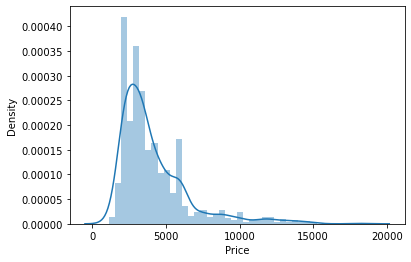

In [55]:
sns.distplot(fDF.Price)

Distribution is skewed and tails of from 15000 mark.

In [56]:
fDF.Price.skew()

2.073830702136953

#### Analyzing the Feature Columns

In [57]:
fDF.dtypes[fDF.dtypes == 'object'] #Identifying the Categorical Columns

Airline              object
Flight Number        object
Date of Departure    object
From                 object
To                   object
Total Stops          object
Day                  object
Month                object
dtype: object

In [58]:
fDF['Airline'].value_counts()

IndiGo       668
Air Asia     286
Air India    282
Go First     210
Vistara      203
SpiceJet     106
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='count'>

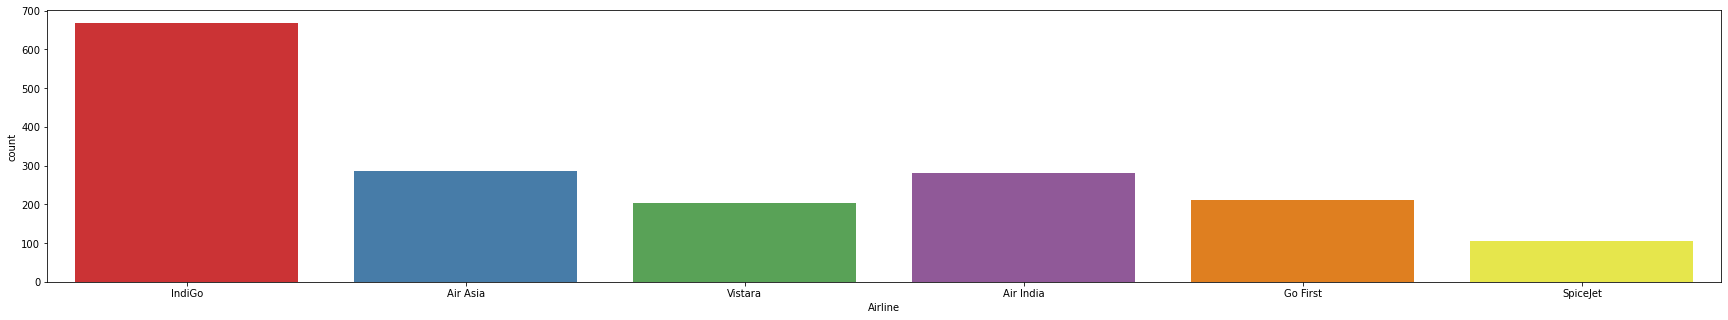

In [59]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(fDF['Airline'], palette="Set1")

IndiGo has the highest number of flights followed by Air India and Vistara

<AxesSubplot:xlabel='count', ylabel='From'>

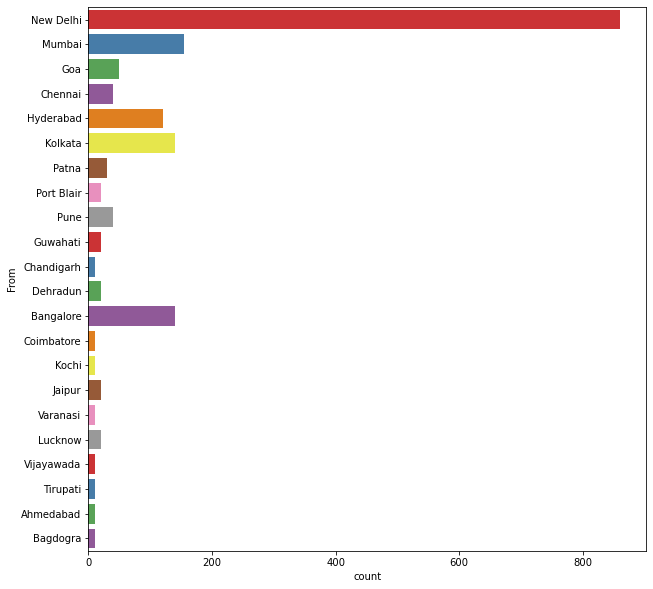

In [60]:
plt.figure(figsize=(10,10),facecolor='white')
sns.countplot(y=fDF['From'], palette="Set1")

Highest number of flights are from Delhi followed by Mumbai, Kolkata,Bangalore and Hyderabad

<AxesSubplot:xlabel='count', ylabel='To'>

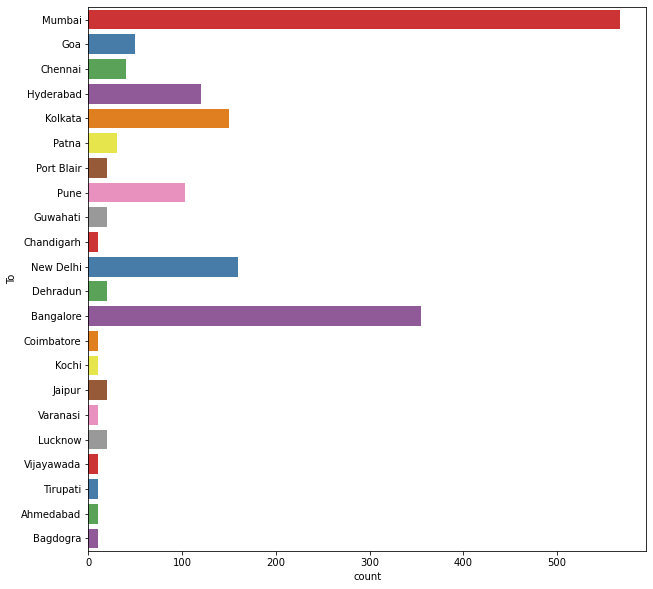

In [61]:
plt.figure(figsize=(10,10),facecolor='white')
sns.countplot(y=fDF['To'], palette="Set1")

Mumbai is the most popular destination followed by Bangalore, Kolkata and Hyderabad

<AxesSubplot:xlabel='Total Stops', ylabel='count'>

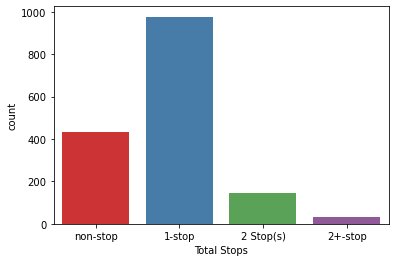

In [62]:
sns.countplot(fDF['Total Stops'], palette="Set1")

Highest number of flights have only 1 stop between source and destination while 2nd highest number of flights are non stop

### Interpreting Relationship between Independent  and Dependent Variables

#### Analyzing Relationship between Day, Month columns and Price

Text(0.5, 1.0, 'Price Trend')

<Figure size 1440x3024 with 0 Axes>

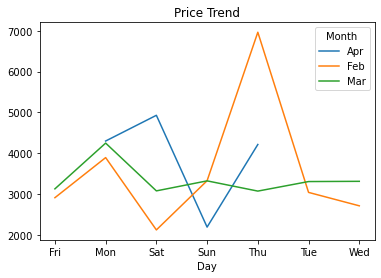

In [63]:
plt.figure(figsize=(20,42))
fDF.groupby(['Day','Month']).mean()['Price'].unstack().plot()
plt.title('Price Trend')

<AxesSubplot:xlabel='Day', ylabel='Price'>

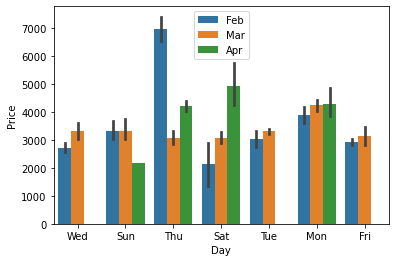

In [64]:
sns.barplot(fDF['Day'],fDF['Price'],hue=Month)

From above graphs it can be observed that on an average, there is a steady decline in Flight price from February to April.

From above graphs it can be observed that Flight Prices increase on an average, as the day of departure gets nearer. 

Flight Ticket prices are the highest on Thursdays,Mondays and during the Weekend on an average.

#### Analyzing Relationship between Airlines and Price

Text(0.5, 1.0, 'Price Trend')

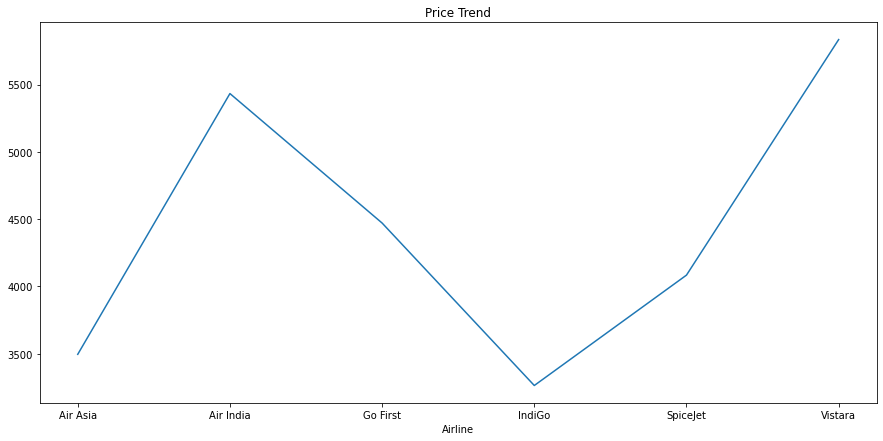

In [65]:
fig, ax = plt.subplots(figsize=(15,7))
fDF.groupby(['Airline']).mean()['Price'].plot(ax=ax)
plt.title('Price Trend')

#Airlines vs Price

Text(0.5, 1.0, 'Price Trend')

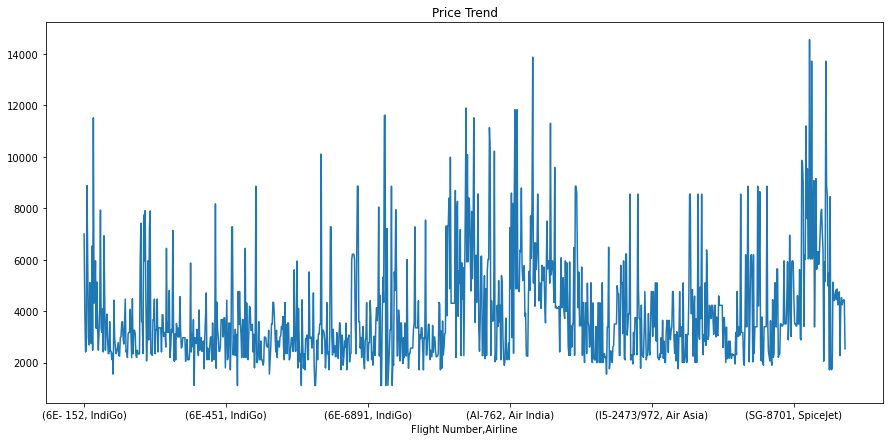

In [66]:
fig, ax = plt.subplots(figsize=(15,7))
fDF.groupby(['Flight Number','Airline'])['Price'].mean().plot(ax=ax)
plt.title('Price Trend')

# Flight numbers vs Price

IndiGo,Air Asia offer air tickets at the most affordable prices on average, whereas Air India, Spicejet are the most expensive on average.

Text(0.5, 1.0, 'Price Trend')

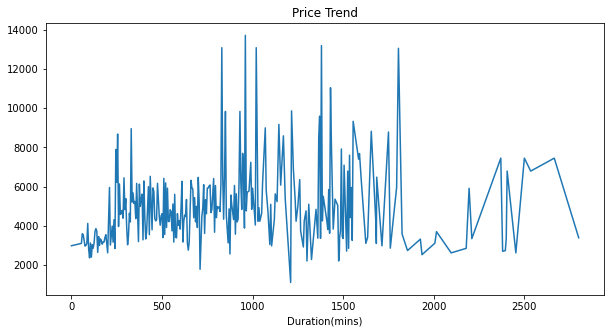

In [67]:
plt.figure(figsize=(10,5))
fDF.groupby('Duration(mins)')['Price'].mean().plot()
plt.title('Price Trend')

Text(0.5, 1.0, 'Duration vs Stops')

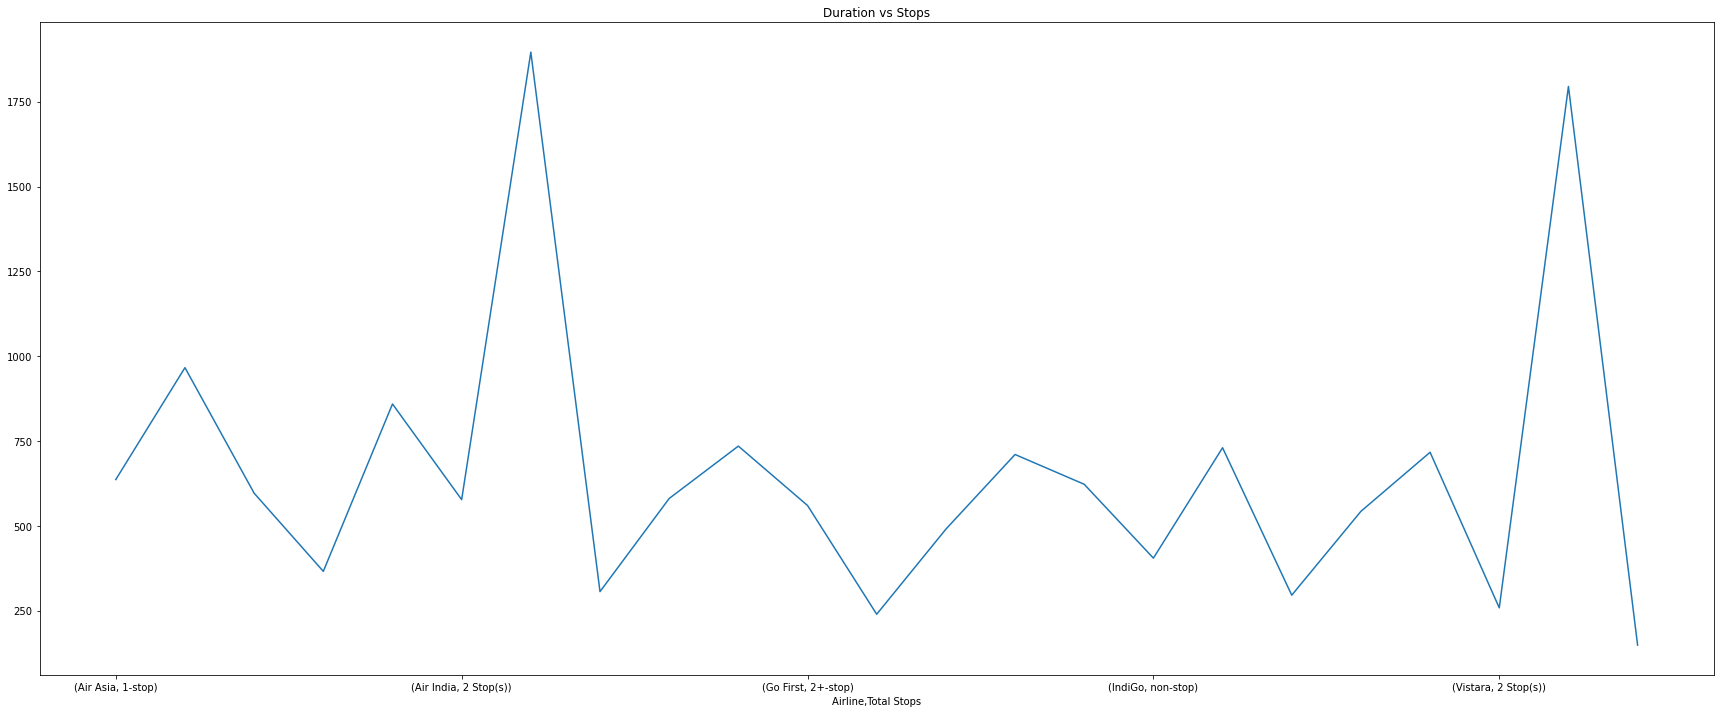

In [68]:
plt.figure(figsize=(30,12))
fDF.groupby(['Airline','Total Stops'])['Duration(mins)'].mean().plot()
plt.title('Duration vs Stops')

It can be observed that Number of Stops impact the travel time of Airlines

Text(0.5, 1.0, 'Price vs Stops')

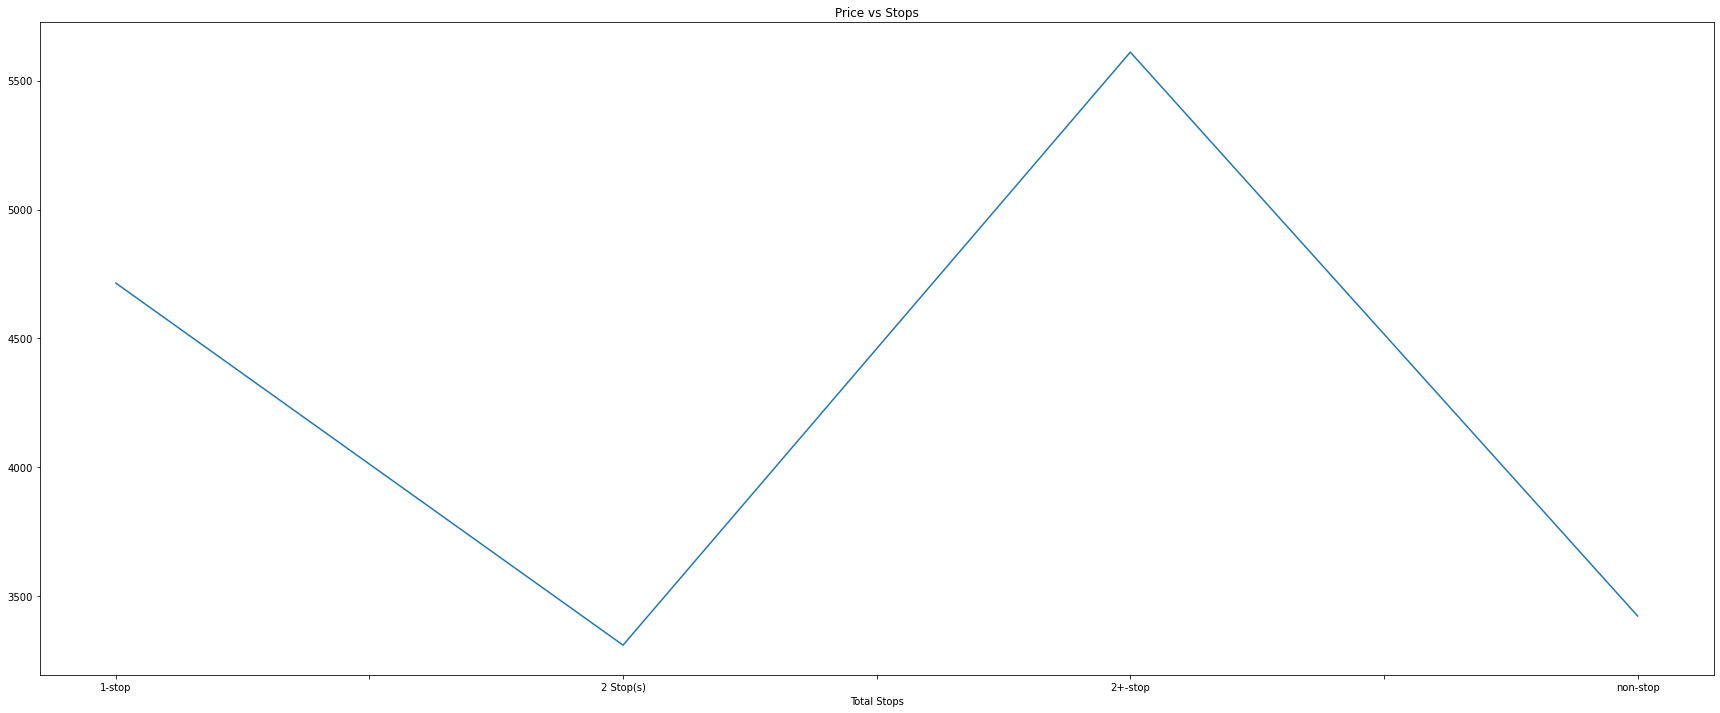

In [69]:
plt.figure(figsize=(30,12))
fDF.groupby(['Total Stops'])['Price'].mean().plot()
plt.title('Price vs Stops')

It can be observed that Number of Stops impact the Air Ticket Pricing of Airlines

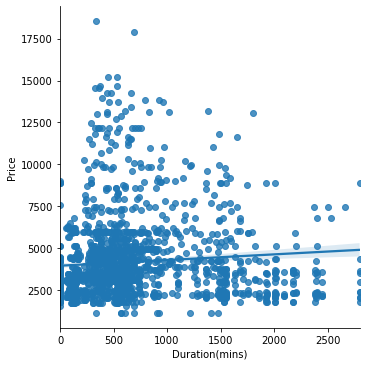

In [70]:
sns.lmplot(x="Duration(mins)", y="Price", data=fDF)

There is a linear relationship between Price and flight duration.

<AxesSubplot:xlabel='To', ylabel='Price'>

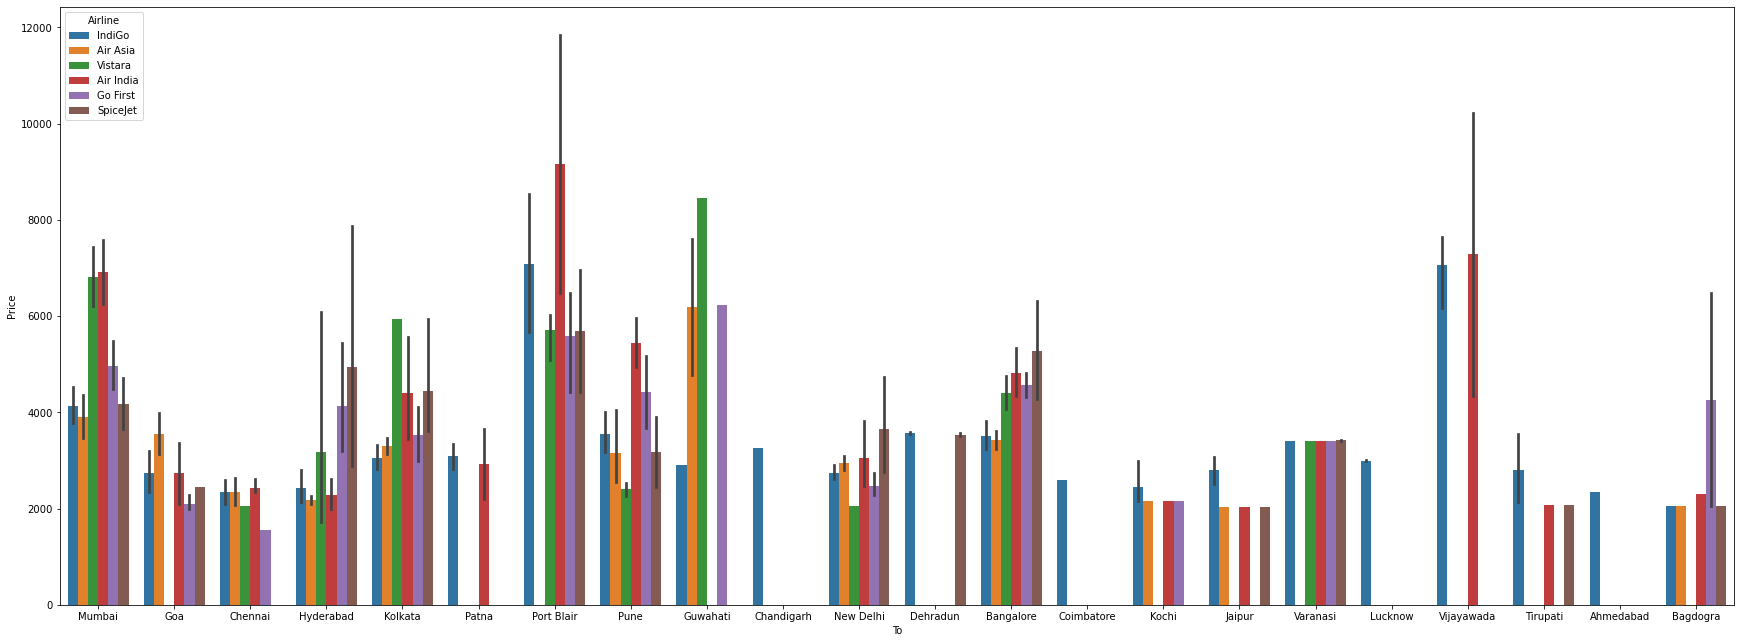

In [71]:
plt.figure(figsize=(30,11),facecolor='white')
sns.barplot(fDF['To'],fDF['Price'],hue=fDF['Airline'])

Mumbai,Bangalore,Kolakata,Port Blair,Vijayawada, Guwahati are the most expensive destinations while,Kochi, Coimbatore,Jammu,Chennai,Hyderabad,Indore,Tirupati are the most affordable destinations

Indigo,Air Asia and Spicejet provide most affordable Airtickets to the destinations

### Checking for Outliers in continuous data type Features.

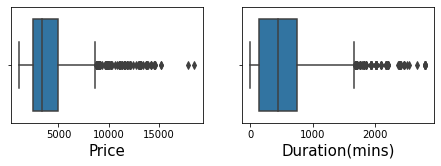

In [72]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in fDF[['Price','Duration(mins)']]:
    if plotnum<=34:
        plt.subplot(8,5,plotnum)
        sns.boxplot(fDF[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

There are outliers in all of the above columns

#### Removing Outliers using Z score Method

In [73]:
df2 =fDF[['Duration(mins)']].copy() #making a copy of the continuous data type column.

In [74]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [75]:
df3.shape

(1720, 1)

In [76]:
df2.shape

(1755, 1)

##### Data loss %:

In [77]:
loss=(1755-1720)/1755 * 100
loss

1.9943019943019942

1.9% Data loss is within acceptable range

#### Using Z score method to reduce outliers since it has a low data loss %

In [78]:
dropindx = fDF.index.difference(df3.index)

In [79]:
dropindx

Int64Index([ 112,  122,  142,  159,  170,  182,  307,  317,  337,  354,  365,
             377,  502,  512,  532,  549,  560,  572,  687,  697,  717,  734,
             745,  757,  872,  882,  902,  919,  930,  942, 1328, 1329, 1332,
            1333, 1334],
           dtype='int64')

In [80]:
fDF.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe


In [81]:
fDF.reset_index(drop=True,inplace = True) #resetting the index of the dataframe

In [82]:
fDF

,Airline,Flight Number,Date of Departure,From,To,Total Stops,Price,Day,Date,Month,Duration(mins)
0,IndiGo,6E-171,"Wed, Feb 16",New Delhi,Mumbai,non-stop,2410,Wed,16,Feb,125
1,IndiGo,6E-6202,"Wed, Feb 16",Mumbai,Mumbai,non-stop,2410,Wed,16,Feb,125
2,Air Asia,I5-764,"Wed, Feb 16",New Delhi,Mumbai,non-stop,2410,Wed,16,Feb,130
3,IndiGo,6E-2054,"Wed, Feb 16",Mumbai,Mumbai,non-stop,2410,Wed,16,Feb,130
4,IndiGo,6E-5001,"Wed, Feb 16",New Delhi,Mumbai,non-stop,2410,Wed,16,Feb,130
...,...,...,...,...,...,...,...,...,...,...,...
1715,Air India,AI-512,"Thu, Feb 17",New Delhi,Mumbai,1-stop,14670,Thu,17,Feb,535
1716,Go First,G8- 286,"Thu, Feb 17",New Delhi,Mumbai,1-stop,15195,Thu,17,Feb,450
1717,Go First,G8- 286,"Thu, Feb 17",New Delhi,Mumbai,1-stop,15195,Thu,17,Feb,530
1718,Air India,AI-885,"Thu, Feb 17",New Delhi,Mumbai,1-stop,17925,Thu,17,Feb,690


<AxesSubplot:xlabel='Duration(mins)'>

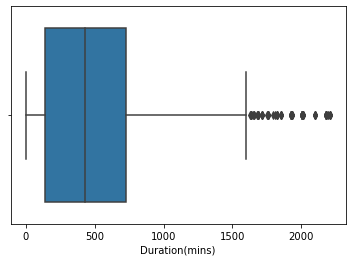

In [83]:
sns.boxplot(fDF['Duration(mins)'])

A lot of outliers have been removed.

### Checking for skewness in data distributions

In [84]:
fDF['Duration(mins)'].skew()

1.2551011930716178

#### Normalizing Data Distribution using PowerTransformer

In [85]:
from sklearn.preprocessing import PowerTransformer

In [86]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [87]:
df4 = fDF[['Duration(mins)']]

In [88]:
transformed= powtrans.fit_transform(df4)

In [89]:
type(transformed)

numpy.ndarray

In [90]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [91]:
transformed.skew()

Duration(mins)   -0.2144
dtype: float64

In [92]:
transformed.index = fDF.index

In [93]:
fDF[['Duration(mins)']] = transformed[['Duration(mins)']]

In [94]:
fDF['Duration(mins)'].skew()

-0.21439998466140675

A lot of skewness has been removed.

### Encoding Categorical Columns

####  Encoding using get_dummies()

In [95]:
fDF

,Airline,Flight Number,Date of Departure,From,To,Total Stops,Price,Day,Date,Month,Duration(mins)
0,IndiGo,6E-171,"Wed, Feb 16",New Delhi,Mumbai,non-stop,2410,Wed,16,Feb,-0.732417
1,IndiGo,6E-6202,"Wed, Feb 16",Mumbai,Mumbai,non-stop,2410,Wed,16,Feb,-0.732417
2,Air Asia,I5-764,"Wed, Feb 16",New Delhi,Mumbai,non-stop,2410,Wed,16,Feb,-0.711270
3,IndiGo,6E-2054,"Wed, Feb 16",Mumbai,Mumbai,non-stop,2410,Wed,16,Feb,-0.711270
4,IndiGo,6E-5001,"Wed, Feb 16",New Delhi,Mumbai,non-stop,2410,Wed,16,Feb,-0.711270
...,...,...,...,...,...,...,...,...,...,...,...
1715,Air India,AI-512,"Thu, Feb 17",New Delhi,Mumbai,1-stop,14670,Thu,17,Feb,0.300941
1716,Go First,G8- 286,"Thu, Feb 17",New Delhi,Mumbai,1-stop,15195,Thu,17,Feb,0.146740
1717,Go First,G8- 286,"Thu, Feb 17",New Delhi,Mumbai,1-stop,15195,Thu,17,Feb,0.292316
1718,Air India,AI-885,"Thu, Feb 17",New Delhi,Mumbai,1-stop,17925,Thu,17,Feb,0.546465


In [96]:
dumm = pd.get_dummies(fDF[['Airline','Total Stops','Day','Month']],drop_first = False)

In [97]:
dumm

,Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Total Stops_1-stop,Total Stops_2 Stop(s),Total Stops_2+-stop,Total Stops_non-stop,Day_Fri,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Mar
0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1716,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1717,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1718,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [98]:
fDF = fDF.join(dumm)

In [99]:
fDF.drop(columns = ['Airline','Flight Number','Total Stops','Day','Month'],inplace=True) #Dropping the columns since they are no longer needed

In [100]:
fDF

,Date of Departure,From,To,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,...,Day_Fri,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Mar
0,"Wed, Feb 16",New Delhi,Mumbai,2410,16,-0.732417,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,"Wed, Feb 16",Mumbai,Mumbai,2410,16,-0.732417,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,"Wed, Feb 16",New Delhi,Mumbai,2410,16,-0.711270,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,"Wed, Feb 16",Mumbai,Mumbai,2410,16,-0.711270,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,"Wed, Feb 16",New Delhi,Mumbai,2410,16,-0.711270,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,"Thu, Feb 17",New Delhi,Mumbai,14670,17,0.300941,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1716,"Thu, Feb 17",New Delhi,Mumbai,15195,17,0.146740,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1717,"Thu, Feb 17",New Delhi,Mumbai,15195,17,0.292316,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1718,"Thu, Feb 17",New Delhi,Mumbai,17925,17,0.546465,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [101]:
fDF.drop(columns = ['Date of Departure'],inplace=True) #dropping 'Date of Departure' column since it is no longer needed

In [102]:
fDF

,From,To,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,...,Day_Fri,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Mar
0,New Delhi,Mumbai,2410,16,-0.732417,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,Mumbai,Mumbai,2410,16,-0.732417,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,New Delhi,Mumbai,2410,16,-0.711270,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,Mumbai,Mumbai,2410,16,-0.711270,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,New Delhi,Mumbai,2410,16,-0.711270,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,New Delhi,Mumbai,14670,17,0.300941,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1716,New Delhi,Mumbai,15195,17,0.146740,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1717,New Delhi,Mumbai,15195,17,0.292316,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1718,New Delhi,Mumbai,17925,17,0.546465,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


#### Encoding Columns 'From' and 'To' using Label Encoder

In [103]:
from sklearn.preprocessing import LabelEncoder

In [104]:
labenc = LabelEncoder()

In [105]:
for col in fDF[['From','To']]:
    fDF[col] = labenc.fit_transform(fDF[col])

In [106]:
fDF

,From,To,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,...,Day_Fri,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Mar
0,15,14,2410,16,-0.732417,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,14,14,2410,16,-0.732417,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,15,14,2410,16,-0.711270,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,14,14,2410,16,-0.711270,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,15,14,2410,16,-0.711270,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,15,14,14670,17,0.300941,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1716,15,14,15195,17,0.146740,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1717,15,14,15195,17,0.292316,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1718,15,14,17925,17,0.546465,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### Finding Correlation 

In [107]:
f_corr =fDF.corr()

In [108]:
f_corr

,From,To,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,...,Day_Fri,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Mar
From,1.000000,-0.051287,0.235333,0.027024,0.104735,-0.077311,0.044919,0.071132,-0.156634,0.018344,...,-0.205406,0.148605,-0.083502,-0.088660,0.155984,-0.050141,-0.130408,0.185507,-0.026517,-0.118011
To,-0.051287,1.000000,0.137410,-0.321822,-0.077410,-0.087738,0.054438,0.026756,0.007589,0.025309,...,-0.002351,-0.326437,0.018071,0.025196,0.165990,-0.026849,0.173559,0.343326,0.220648,-0.490964
Price,0.235333,0.137410,1.000000,0.141556,0.199889,-0.115640,0.227466,0.048750,-0.284905,-0.004823,...,-0.116708,-0.018291,-0.067127,-0.116067,0.317177,-0.076155,-0.176529,0.002242,0.199984,-0.203833
Date,0.027024,-0.321822,0.141556,1.000000,0.029777,0.004668,0.040136,0.012629,-0.087704,-0.013994,...,-0.181548,0.184152,0.026648,0.121917,-0.095775,0.112834,-0.157035,-0.265223,0.175609,0.029581
Duration(mins),0.104735,-0.077410,0.199889,0.029777,1.000000,0.013944,0.145262,-0.026340,-0.154243,-0.015687,...,-0.062713,0.087951,0.044422,-0.129289,0.081133,-0.025376,-0.097191,0.069100,-0.100697,0.047814
Airline_Air Asia,-0.077311,-0.087738,-0.115640,0.004668,0.013944,1.000000,-0.192374,-0.161961,-0.343066,-0.111387,...,0.019505,-0.026008,0.060523,0.065808,-0.073870,0.112048,-0.021169,-0.063254,-0.020162,0.069749
Airline_Air India,0.044919,0.054438,0.227466,0.040136,0.145262,-0.192374,1.000000,-0.161613,-0.342330,-0.111148,...,-0.091427,0.071008,-0.021659,-0.045729,0.083658,-0.038152,-0.081449,0.057483,0.019559,-0.064636
Airline_Go First,0.071132,0.026756,0.048750,0.012629,-0.026340,-0.161961,-0.161613,1.000000,-0.288210,-0.093576,...,-0.033545,0.024933,-0.013446,-0.031511,0.054120,-0.031851,-0.037460,0.039713,-0.016912,-0.013911
Airline_IndiGo,-0.156634,0.007589,-0.284905,-0.087704,-0.154243,-0.343066,-0.342330,-0.288210,1.000000,-0.198214,...,0.149560,-0.063759,0.032290,0.068551,-0.147898,0.014598,0.111136,-0.102335,0.057008,0.022276
Airline_SpiceJet,0.018344,0.025309,-0.004823,-0.013994,-0.015687,-0.111387,-0.111148,-0.093576,-0.198214,1.000000,...,-0.028801,-0.017435,-0.044447,0.016688,-0.042933,-0.029376,0.132385,-0.034754,-0.016086,0.043384


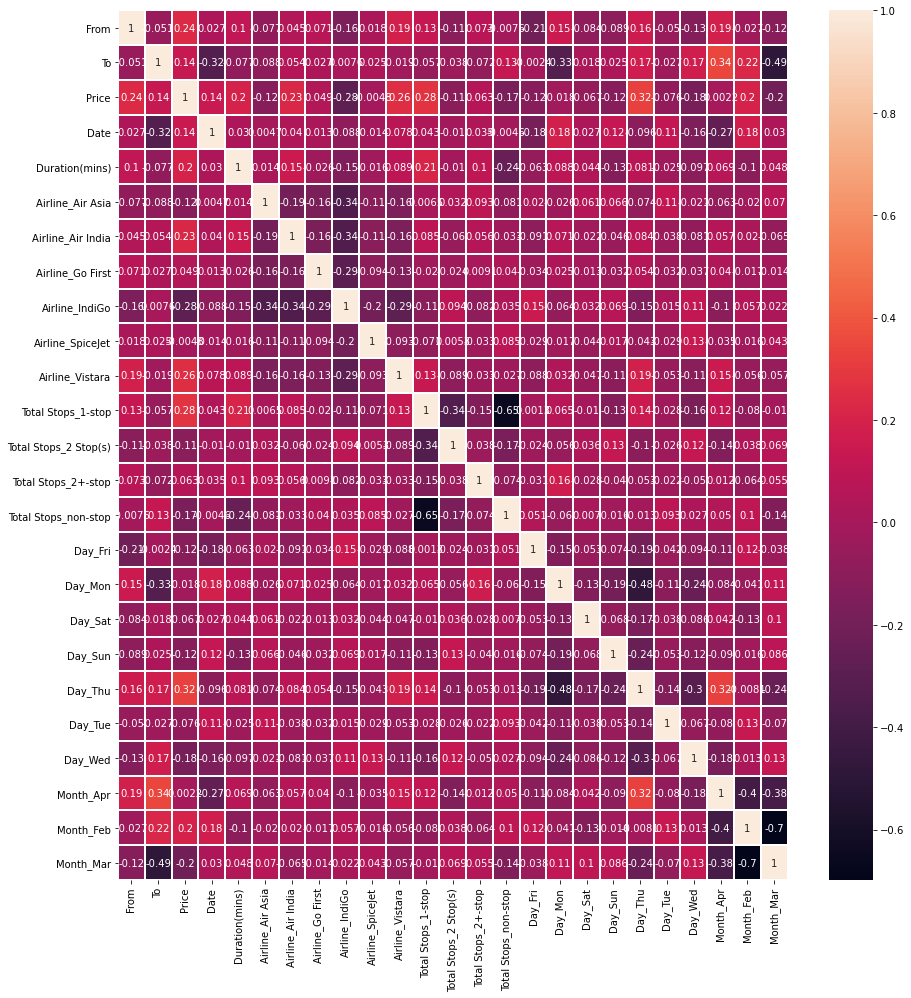

In [109]:
plt.figure(figsize=(15,16))
sns.heatmap(f_corr,annot=True,linewidth=1)
plt.show()

### Visualizing correlation of feature columns with label column.

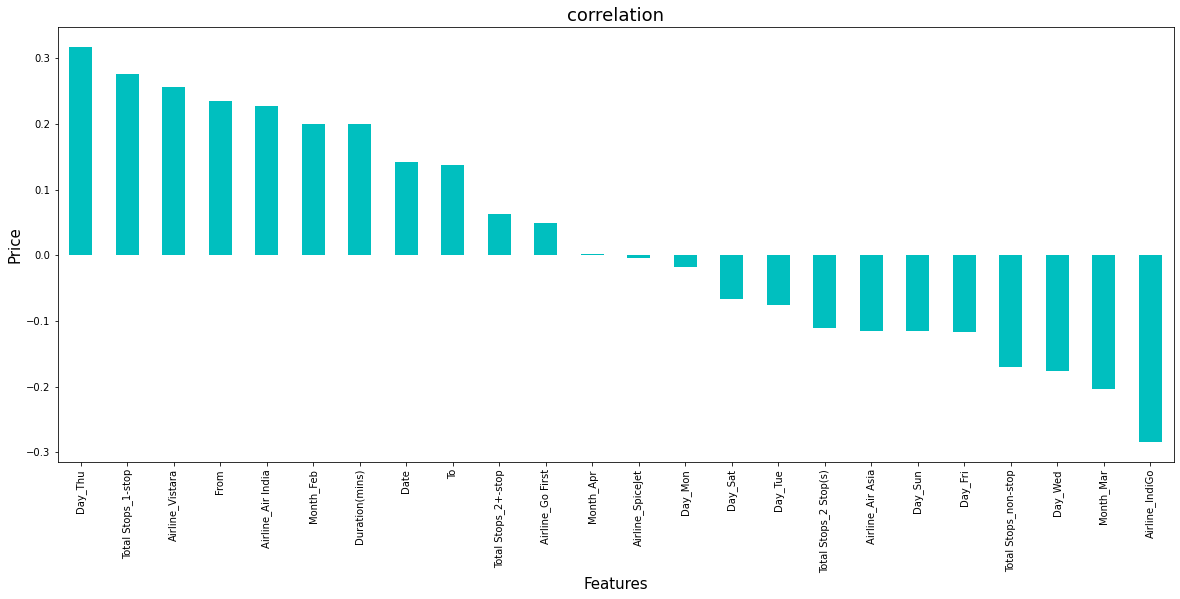

In [110]:
plt.figure(figsize = (20,8))
fDF.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

It is observed that Month_Dec, Duration(mins), Airline_Vistara,Total Stops_1-stop and From have the highest positive correlation with Price, while Date,Total Stops_non-stop,Month_Jan,Airline_IndiGo have the highest negative correlation with Price

### Feature Selection

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
X = fDF.drop(columns = ['Price'])
y = fDF['Price']

In [113]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
vif = pd.DataFrame()

In [116]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [117]:
vif

,Features,vif
0,From,1.201927e+00
1,To,1.824593e+00
2,Date,1.390690e+00
3,Duration(mins),1.147876e+00
4,Airline_Air Asia,1.204271e+05
5,Airline_Air India,3.706042e+04
6,Airline_Go First,7.865424e+03
7,Airline_IndiGo,2.066297e+03
8,Airline_SpiceJet,inf
9,Airline_Vistara,1.243018e+04


MultiCollinearity exists amongst many columns, Based on ANOVA F scores, columns scoring the lowest will be dropped.

### Selecting Kbest Features

In [118]:
from sklearn.feature_selection import SelectKBest, f_classif

In [119]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [120]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(30,'Score'))

                  Feature       Score
1                      To  112.452445
8        Airline_SpiceJet   24.100392
21              Month_Apr   17.218664
5       Airline_Air India   13.726673
9         Airline_Vistara   11.837642
15                Day_Mon   10.789923
4        Airline_Air Asia   10.558235
6        Airline_Go First   10.451841
7          Airline_IndiGo    9.668236
18                Day_Thu    8.464601
22              Month_Feb    8.211958
23              Month_Mar    8.128712
2                    Date    5.207948
19                Day_Tue    5.122579
17                Day_Sun    4.881652
13   Total Stops_non-stop    4.608638
14                Day_Fri    4.573294
16                Day_Sat    4.388452
12    Total Stops_2+-stop    3.787652
20                Day_Wed    3.766408
10     Total Stops_1-stop    3.520098
0                    From    2.913797
3          Duration(mins)    2.010686
11  Total Stops_2 Stop(s)    1.680018


#### Selecting best features based on their scores:

In [121]:
x_best = X.copy()

In [122]:
scaled_x_best = scaler.fit_transform(x_best)

### This is a Regression Problem since Target/ Label column ('Price') has Continuous type of Data.


## Regression Model Building

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
from sklearn.metrics import r2_score

#### Finding the Best Random State

In [125]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.7679821466090183 on random_state: 90


In [126]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state =58)

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR



In [128]:
from sklearn.metrics import r2_score,mean_squared_error

In [129]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()

### Training the Models

In [130]:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeRegressor()

All models have been trained.

### Ridge Regression Model

In [131]:
y_r_pred = r.predict(x_test)

####  R2 Score

In [132]:
r2_score(y_test,y_r_pred)

0.3326467726669383

#### Mean Squared Error 

In [133]:
mean_squared_error(y_test,y_r_pred)

4095467.6825310453

#### Root Mean Squared Error

In [134]:
np.sqrt(mean_squared_error(y_test,y_r_pred))

2023.7261876378052

###  Random Forest Regression Model

In [135]:
y_rf_pred = rf.predict(x_test)

#### R2 Score

In [136]:
r2_score(y_test,y_rf_pred)

0.6917106701409887

#### Mean Squared Error

In [137]:
mean_squared_error(y_test,y_rf_pred)

1891935.0886372544

#### Root Mean Squared Error

In [138]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))

1375.4763133683016

### XGB Regression Model 

In [139]:
y_xg_pred = xg.predict(x_test)

####  R2 Score

In [140]:
r2_score(y_test,y_xg_pred)

0.6640856818144221

#### Mean Squared Error

In [141]:
mean_squared_error(y_test,y_xg_pred)

2061466.3687569008

#### Root Mean Squared Error

In [142]:
np.sqrt(mean_squared_error(y_test,y_xg_pred))

1435.7807523284678

### Support Vector Regression Model

In [143]:
y_svr_pred = SV.predict(x_test)

####  R2 Score

In [144]:
r2_score(y_test,y_svr_pred)

-0.08381851615143732

#### Mean Squared Error

In [145]:
mean_squared_error(y_test,y_svr_pred)

6651265.813706301

#### Root Mean Squared Error

In [146]:
np.sqrt(mean_squared_error(y_test,y_svr_pred))

2579.0048107179446

###  Decision Tree Regression Model

In [147]:
y_dt_pred = dt.predict(x_test)

####  R2 Score

In [148]:
r2_score(y_test,y_dt_pred)

0.5680911374195281

#### Mean Squared Error

In [149]:
mean_squared_error(y_test,y_dt_pred)

2650573.5134689924

#### Root Mean Squared Error

In [150]:
np.sqrt(mean_squared_error(y_test,y_dt_pred))

1628.058203341942

### Model Cross Validation

In [151]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

#### Ridge Regression

In [152]:
cross_val_score(r,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.41982788226680706

#### Random Forest Regression

In [153]:
cross_val_score(rf,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.7185377573619208

#### XGB Regression

In [154]:
cross_val_score(xg,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.6568234653572597

#### SV Regression

In [155]:
cross_val_score(SV,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

-0.10618573522363528

#### Decision Tree Regression

In [156]:
cross_val_score(dt,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.5774596473760143

### Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It also has the lowest Root Mean Squared Error score

### Hyper Parameter Tuning

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
parameter = {'n_estimators':[30,60,80],'max_depth': [40,50,80],'min_samples_leaf':[5,10,20],'min_samples_split':[2,5,10],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [159]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=ShuffleSplit(5),n_jobs = -1,verbose = 1)

In [160]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [40, 50, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [30, 60, 80]},
             verbose=1)

In [161]:
GridCV.best_params_

{'criterion': 'mse',
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 80}

In [162]:
Best_mod = RandomForestRegressor(n_estimators = 80,criterion = 'mse', max_depth= 80, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 2)

Best_mod.fit(x_train,y_train)

RandomForestRegressor(max_depth=80, min_samples_leaf=5, n_estimators=80)

In [163]:
rfpred = Best_mod.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)

67.91622658509915


##### Random Forest Regressor has an accuracy of 83.55%

#### Saving The Model

In [164]:
import joblib
joblib.dump(Best_mod,"BestModelFlight.pkl")

['BestModelFlight.pkl']

#### Loading The Model

In [165]:
mod=joblib.load("BestModelFlight.pkl")

In [166]:
print(mod.predict(scaled_x_best))

[ 2777.43833078  2484.26954515  2893.11382091 ...  7809.60720698
 11047.64939082 12598.35137586]


In [167]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(scaled_x_best), 'Actual Values': y})
Prediction_accuracy.head(20)

,Predictions,Actual Values
0,2777.438331,2410
1,2484.269545,2410
2,2893.113821,2410
3,2457.818345,2410
4,2783.474112,2410
5,2457.818345,2410
6,2783.474112,2410
7,2457.818345,2410
8,2773.085526,2410
9,2459.921077,2410
